In [7]:
import pandas as pd

# Load the datasets
fuel_df = pd.read_csv('../Data/Fuel.csv')
industry_df = pd.read_csv('../Data/Industry.csv')
unit_df = pd.read_csv('../Data/Unit.csv')

# Display the first few rows of each dataset to understand their structure and content
fuel_df_head = fuel_df.head()
industry_df_head = industry_df.head()
unit_df_head = unit_df.head()

(fuel_df_head, industry_df_head, unit_df_head)


(   Facility.Id        FRS.Id Facility.Name      City State  \
 0      1000112  1.100440e+11  23rd and 3rd  Brooklyn    NY   
 1      1000112  1.100440e+11  23rd and 3rd  Brooklyn    NY   
 2      1000112  1.100440e+11  23rd and 3rd  Brooklyn    NY   
 3      1000112  1.100440e+11  23rd and 3rd  Brooklyn    NY   
 4      1000112  1.100440e+11  23rd and 3rd  Brooklyn    NY   
 
    Primary.NAICS.Code  Year Industry.Type        Sector Unit.Name  \
 0              221112  2022           C,D  Power Plants      2301   
 1              221112  2022           C,D  Power Plants      2302   
 2              221112  2022           C,D  Power Plants   Heatec1   
 3              221112  2022           C,D  Power Plants   Heatec2   
 4              221112  2021           C,D  Power Plants      2301   
 
      Fuel.Type                   Specific.Fuel.Type Other.Fuel.Name  \
 0  Natural Gas  Natural Gas (Weighted U.S. Average)             NaN   
 1  Natural Gas  Natural Gas (Weighted U.S. Average)  

/var/folders/l5/2h1t38ld23b0fmqx49g_q67c0000gn/T/ipykernel_51316/387238317.py:34: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


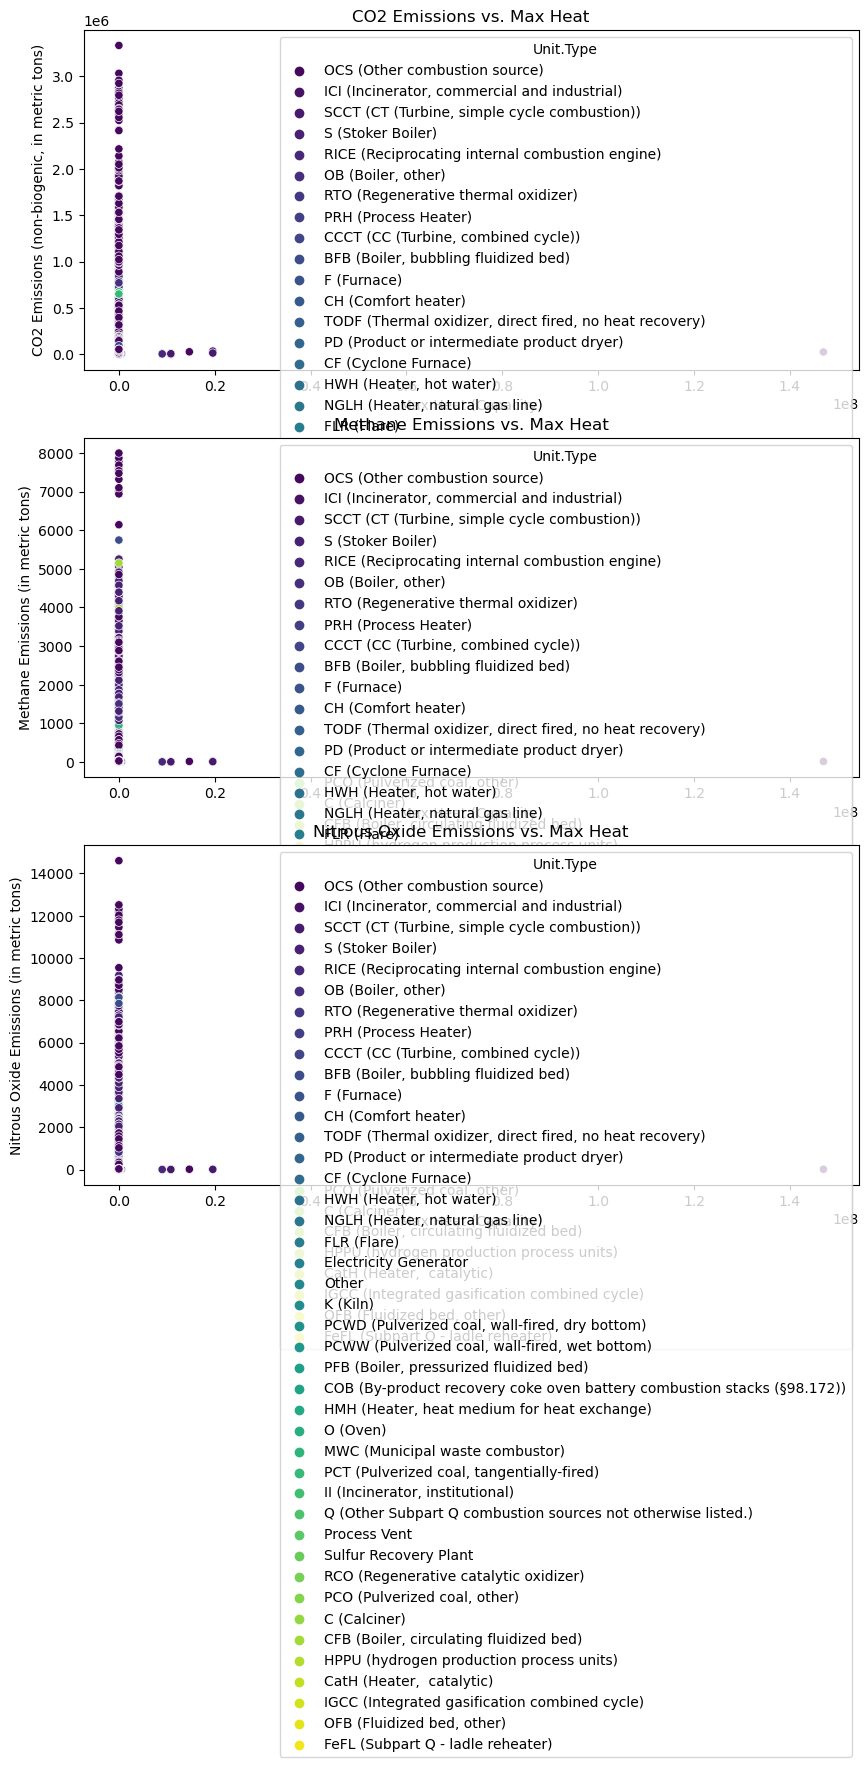

(-0.0011704438879876118, -0.0011043945140779335, -0.001147467377361012)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe to include only relevant columns for this analysis
analysis_df = unit_df[['Unit.Type', 'Max.Heat', 'CO2.emissions.non.biogenic.', 'Methane.emissions', 'Nitrous.Oxide.emissions']].copy()

# Drop rows with missing or zero values in 'Max.Heat' and emissions columns to ensure meaningful correlation analysis
analysis_df = analysis_df[(analysis_df['Max.Heat'] > 0) & 
                          (analysis_df['CO2.emissions.non.biogenic.'] > 0) &
                          (analysis_df['Methane.emissions'] > 0) &
                          (analysis_df['Nitrous.Oxide.emissions'] > 0)]

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# CO2 Emissions vs Max Heat
sns.scatterplot(data=analysis_df, x='Max.Heat', y='CO2.emissions.non.biogenic.', hue='Unit.Type', ax=axs[0], palette='viridis')
axs[0].set_title('CO2 Emissions vs. Max Heat')
axs[0].set_xlabel('Max Heat (Capacity)')
axs[0].set_ylabel('CO2 Emissions (non-biogenic, in metric tons)')

# Methane Emissions vs Max Heat
sns.scatterplot(data=analysis_df, x='Max.Heat', y='Methane.emissions', hue='Unit.Type', ax=axs[1], palette='viridis')
axs[1].set_title('Methane Emissions vs. Max Heat')
axs[1].set_xlabel('Max Heat (Capacity)')
axs[1].set_ylabel('Methane Emissions (in metric tons)')

# Nitrous Oxide Emissions vs Max Heat
sns.scatterplot(data=analysis_df, x='Max.Heat', y='Nitrous.Oxide.emissions', hue='Unit.Type', ax=axs[2], palette='viridis')
axs[2].set_title('Nitrous Oxide Emissions vs. Max Heat')
axs[2].set_xlabel('Max Heat (Capacity)')
axs[2].set_ylabel('Nitrous Oxide Emissions (in metric tons)')

plt.tight_layout()
plt.show()

# Calculating correlation coefficients
correlation_co2 = analysis_df['Max.Heat'].corr(analysis_df['CO2.emissions.non.biogenic.'])
correlation_methane = analysis_df['Max.Heat'].corr(analysis_df['Methane.emissions'])
correlation_nitrous = analysis_df['Max.Heat'].corr(analysis_df['Nitrous.Oxide.emissions'])

(correlation_co2, correlation_methane, correlation_nitrous)


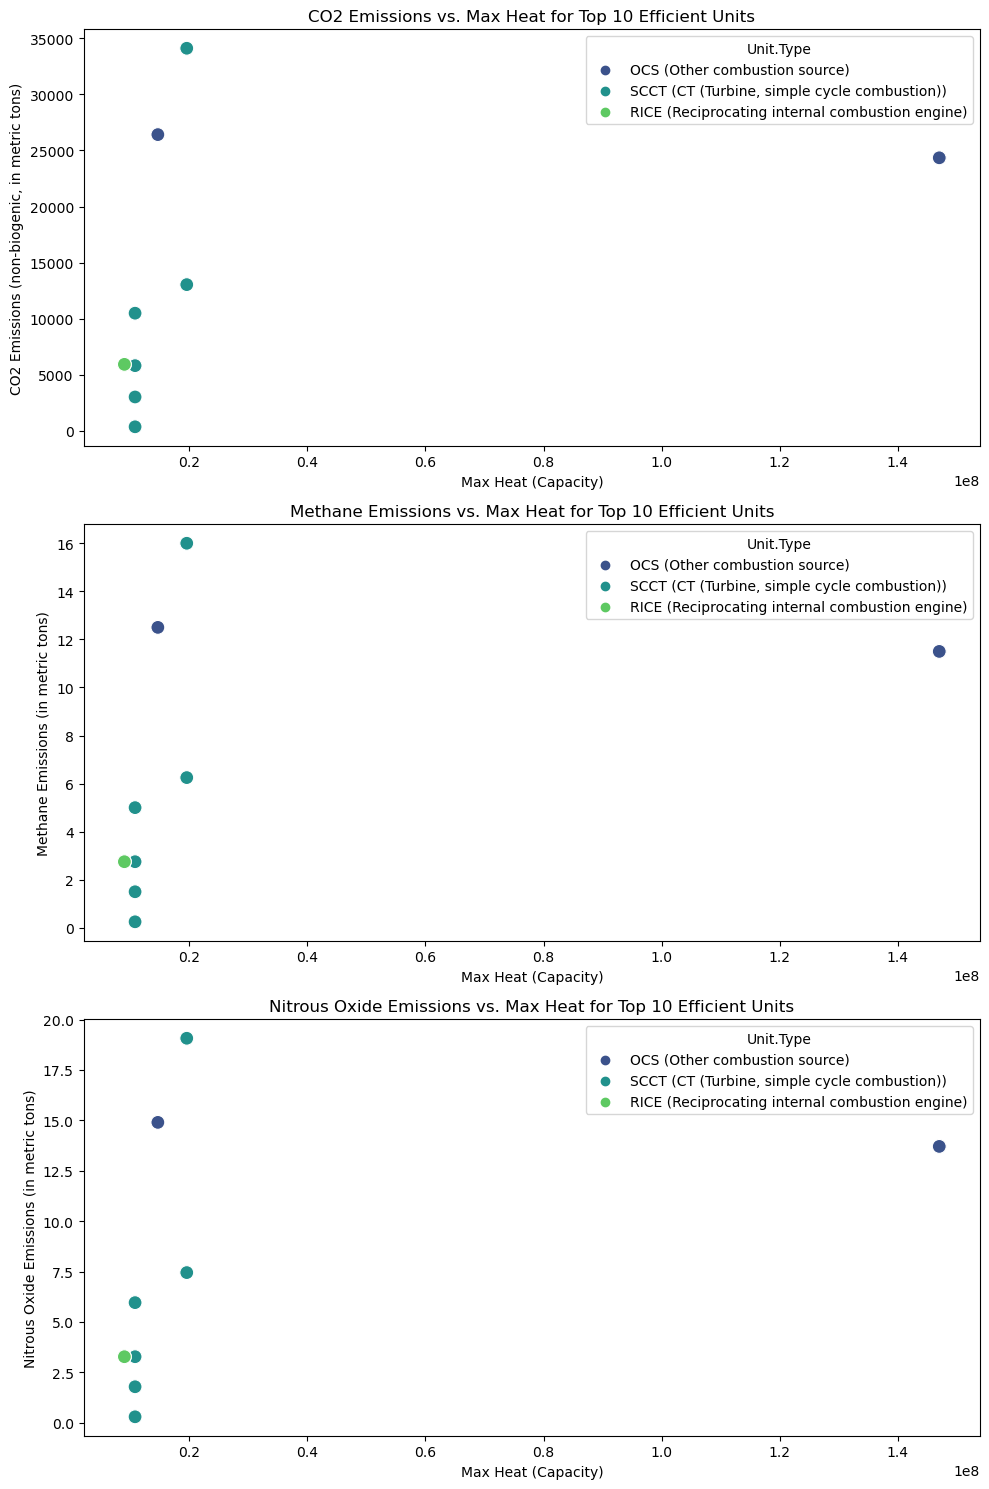

In [9]:
# Identify the top 10 most efficient units based on 'Max.Heat'
top_efficient_units = analysis_df.nlargest(10, 'Max.Heat')

# Plotting for the top 10 efficient units
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# CO2 Emissions vs Max Heat for Top 10 Efficient Units
sns.scatterplot(data=top_efficient_units, x='Max.Heat', y='CO2.emissions.non.biogenic.', hue='Unit.Type', ax=axs[0], palette='viridis', s=100)
axs[0].set_title('CO2 Emissions vs. Max Heat for Top 10 Efficient Units')
axs[0].set_xlabel('Max Heat (Capacity)')
axs[0].set_ylabel('CO2 Emissions (non-biogenic, in metric tons)')

# Methane Emissions vs Max Heat for Top 10 Efficient Units
sns.scatterplot(data=top_efficient_units, x='Max.Heat', y='Methane.emissions', hue='Unit.Type', ax=axs[1], palette='viridis', s=100)
axs[1].set_title('Methane Emissions vs. Max Heat for Top 10 Efficient Units')
axs[1].set_xlabel('Max Heat (Capacity)')
axs[1].set_ylabel('Methane Emissions (in metric tons)')

# Nitrous Oxide Emissions vs Max Heat for Top 10 Efficient Units
sns.scatterplot(data=top_efficient_units, x='Max.Heat', y='Nitrous.Oxide.emissions', hue='Unit.Type', ax=axs[2], palette='viridis', s=100)
axs[2].set_title('Nitrous Oxide Emissions vs. Max Heat for Top 10 Efficient Units')
axs[2].set_xlabel('Max Heat (Capacity)')
axs[2].set_ylabel('Nitrous Oxide Emissions (in metric tons)')

plt.tight_layout()
plt.show()


In [10]:
# Assign GWP values from the table to the respective gases
gwp_values = {
    'CO2': 1,
    'CH4': 25,
    'N2O': 298
}

# Standardize emissions to CO2 equivalents
unit_df['CO2_eq_emissions'] = (unit_df['CO2.emissions.non.biogenic.'] * gwp_values['CO2'] +
                               unit_df['Methane.emissions'] * gwp_values['CH4'] +
                               unit_df['Nitrous.Oxide.emissions'] * gwp_values['N2O'])

# Calculate the eco score for each unit
unit_df['Eco_Score'] = unit_df['CO2_eq_emissions'] / unit_df['Max.Heat']  # This assumes 'Max.Heat' is a proxy for output

# Aggregate the eco scores by Industry.Type and Sector
industry_eco_score = unit_df.groupby('Industry.Type')['Eco_Score'].sum().reset_index()
sector_eco_score = unit_df.groupby('Sector')['Eco_Score'].sum().reset_index()

# Sort the results to find the industries and sectors with the highest eco scores
industry_eco_score_sorted = industry_eco_score.sort_values(by='Eco_Score', ascending=False)
sector_eco_score_sorted = sector_eco_score.sort_values(by='Eco_Score', ascending=False)

(industry_eco_score_sorted.head(), sector_eco_score_sorted.head())  # Displaying only the top 5 for brevity


(    Industry.Type  Eco_Score
 89         C,NN,W        inf
 129           C,Y        inf
 28         C,D,PP        inf
 126           C,W        inf
 38    C,DD,TT,W,X        inf,
                                Sector  Eco_Score
 0                           Chemicals        inf
 32                             Metals        inf
 60     Power Plants, Suppliers of CO2        inf
 58                       Power Plants        inf
 55  Petroleum and Natural Gas Systems        inf)

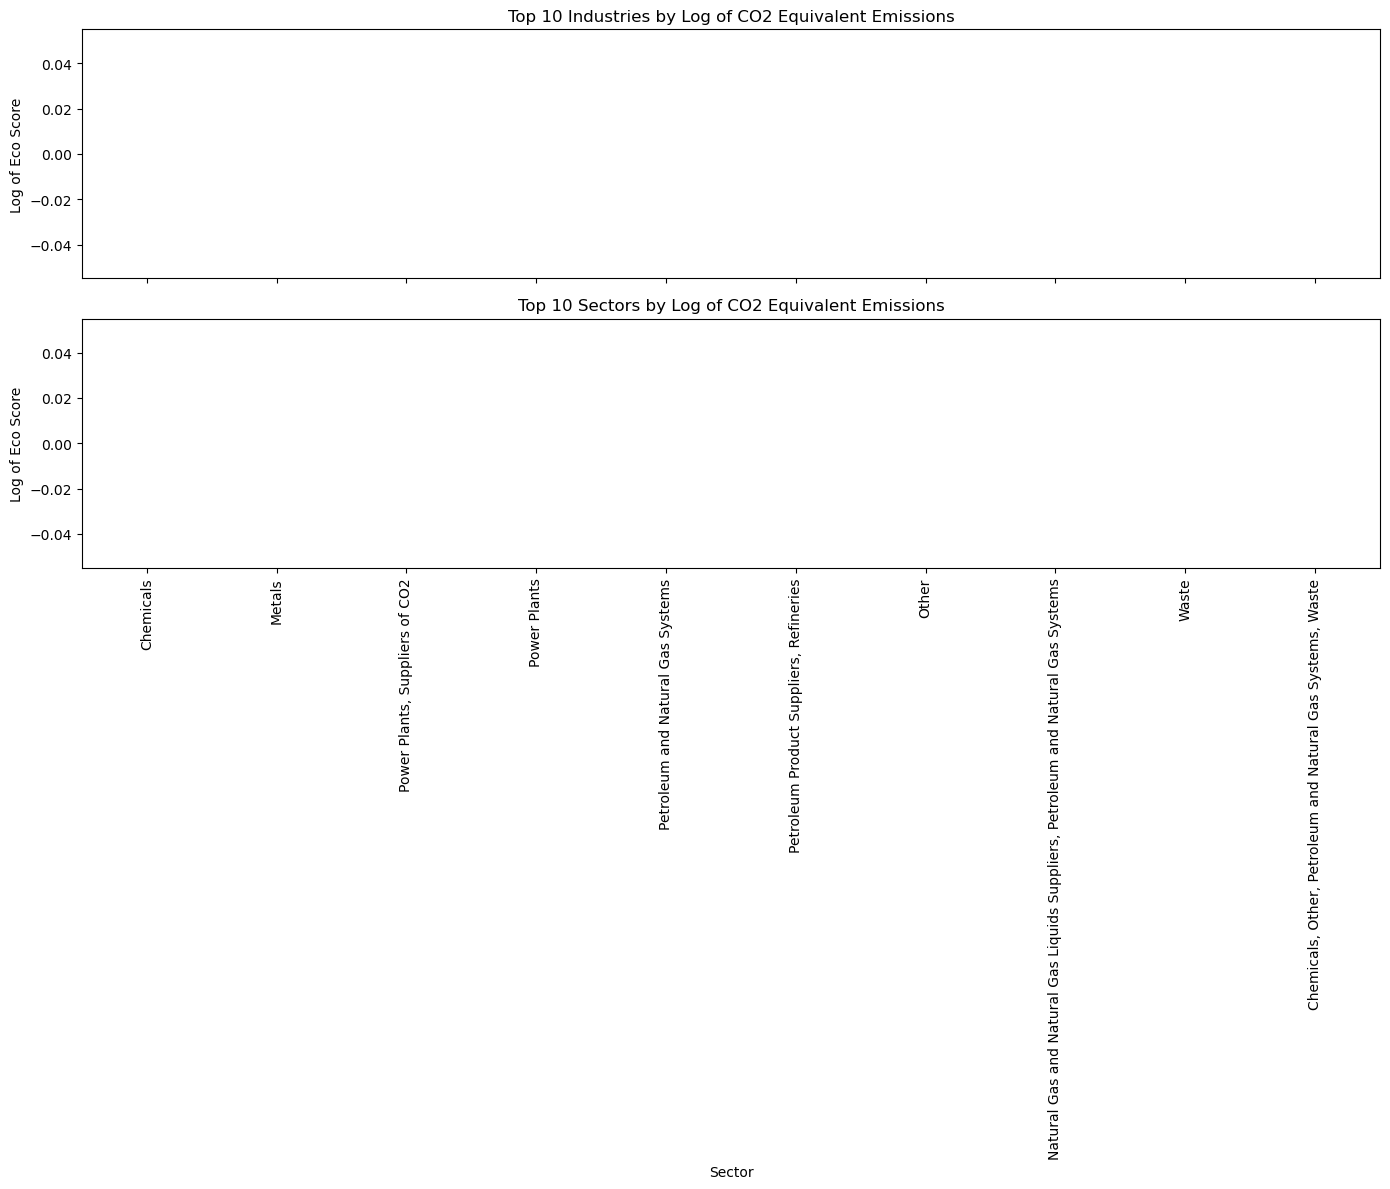

In [11]:
import numpy as np

# Since the eco scores can be very large, for visualization purposes, we might want to use a logarithmic scale.
# First, we need to ensure there are no zero or negative values. We will replace any zeros with a small number
# (e.g., 1e-10, which is close to zero on a log scale but won't cause an error when taking the log).
industry_eco_score_sorted['Eco_Score_Log'] = np.log10(industry_eco_score_sorted['Eco_Score'].replace(0, 1e-10))
sector_eco_score_sorted['Eco_Score_Log'] = np.log10(sector_eco_score_sorted['Eco_Score'].replace(0, 1e-10))

# Get the top industries and sectors for visualization
top_industries = industry_eco_score_sorted.head(10)
top_sectors = sector_eco_score_sorted.head(10)

# Plotting the top industries and sectors by their log eco scores
fig, axs = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Top Industries
sns.barplot(data=top_industries, x='Industry.Type', y='Eco_Score_Log', ax=axs[0], palette='viridis')
axs[0].set_title('Top 10 Industries by Log of CO2 Equivalent Emissions')
axs[0].set_ylabel('Log of Eco Score')
axs[0].set_xlabel('')

# Top Sectors
sns.barplot(data=top_sectors, x='Sector', y='Eco_Score_Log', ax=axs[1], palette='viridis')
axs[1].set_title('Top 10 Sectors by Log of CO2 Equivalent Emissions')
axs[1].set_ylabel('Log of Eco Score')
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()
